# SQL ข้อมูลฝุ่นละอองและอุณหภูมิจากเซ็นเซอร์

## วิษณุ   ค้าเครื่องเรือน 6030822121

## ER diagram

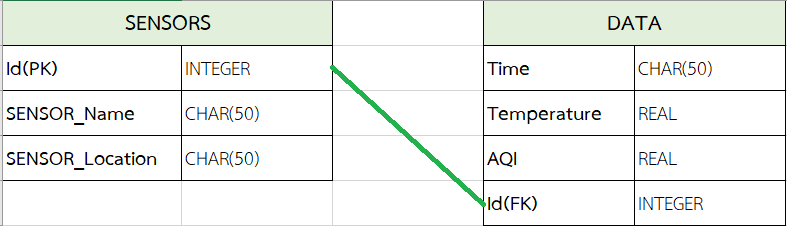

In [1]:
# ให้ทำการติดตั้ง conda install requests และ conda install requests pillow
from PIL import Image
import requests
from io import BytesIO
response = requests.get('https://raw.githubusercontent.com/WITSANUKHA/SQL/master/ER.png')
img = Image.open(BytesIO(response.content))
img

## สร้างตาราง

In [2]:
import sqlite3

t = sqlite3.connect('sqlaqidata.db')
print("Opened database successfully");

t.execute('''
CREATE TABLE IF NOT EXISTS Sensors (
    Id INTEGER PRIMARY KEY NOT NULL,
    SENSOR_Name CHAR(50) NOT NULL,
    SENSOR_Location CHAR(50) NOT NULL
);''')

t.execute('''
CREATE TABLE Data (
    Date_Time CHAR(50) NOT NULL,
    Temperature REAL NOT NULL,
    AQI REAL NOT NULL,
    Id INTEGER  NOT NULL
        CONSTRAINT fk_Sensors_Id REFERENCES Sensors(Id));''')

t.commit()

print("Table created successfully");

Opened database successfully
Table created successfully


## นำเข้าข้อมูล

In [3]:
t.execute("INSERT INTO Sensors(Id,SENSOR_Name,SENSOR_Location) VALUES(1,'Aa','Engineering');")
t.execute("INSERT INTO Sensors(Id,SENSOR_Name,SENSOR_Location) VALUES(2,'Bb','Architecture');")
t.execute("INSERT INTO Sensors(Id,SENSOR_Name,SENSOR_Location) VALUES(3,'Cc','Arts');")
t.execute("INSERT INTO Sensors(Id,SENSOR_Name,SENSOR_Location) VALUES(4,'Dd','Commerce and Accountancy');")
t.execute("INSERT INTO Sensors(Id,SENSOR_Name,SENSOR_Location) VALUES(5,'Ee','Dentistry');")

t.execute("INSERT INTO Data(Date_Time,Temperature,AQI,Id) VALUES('01/01/2020  08:00:00',35.0,50.4,1);")
t.execute("INSERT INTO Data(Date_Time,Temperature,AQI,Id) VALUES('01/01/2020  08:00:00',35.2,51.0,2);")
t.execute("INSERT INTO Data(Date_Time,Temperature,AQI,Id) VALUES('01/01/2020  08:00:00',34.9,48.2,3);")
t.execute("INSERT INTO Data(Date_Time,Temperature,AQI,Id) VALUES('01/01/2020  08:00:00',35.6,49.5,4);")
t.execute("INSERT INTO Data(Date_Time,Temperature,AQI,Id) VALUES('01/01/2020  08:00:00',35.1,50.1,5);")

t.execute("INSERT INTO Data(Date_Time,Temperature,AQI,Id) VALUES('01/01/2020  09:00:00',35.5,48.2,1);")
t.execute("INSERT INTO Data(Date_Time,Temperature,AQI,Id) VALUES('01/01/2020  09:00:00',35.6,49.9,2);")
t.execute("INSERT INTO Data(Date_Time,Temperature,AQI,Id) VALUES('01/01/2020  09:00:00',35.0,49.7,3);")
t.execute("INSERT INTO Data(Date_Time,Temperature,AQI,Id) VALUES('01/01/2020  09:00:00',35.7,48.4,4);")
t.execute("INSERT INTO Data(Date_Time,Temperature,AQI,Id) VALUES('01/01/2020  09:00:00',35.3,48.8,5);")

t.execute("INSERT INTO Data(Date_Time,Temperature,AQI,Id) VALUES('01/01/2020  10:00:00',35.7,51.2,1);")
t.execute("INSERT INTO Data(Date_Time,Temperature,AQI,Id) VALUES('01/01/2020  10:00:00',35.9,51.9,2);")
t.execute("INSERT INTO Data(Date_Time,Temperature,AQI,Id) VALUES('01/01/2020  10:00:00',35.5,50.5,3);")
t.execute("INSERT INTO Data(Date_Time,Temperature,AQI,Id) VALUES('01/01/2020  10:00:00',35.4,50.1,4);")
t.execute("INSERT INTO Data(Date_Time,Temperature,AQI,Id) VALUES('01/01/2020  10:00:00',35.7,50.4,5);")

## ทดลอง query เลือกทุกแถวทุกคอลัมน์มาจากตาราง

In [4]:
for row in t.execute("SELECT * FROM SENSORS"):
  print(row)

(1, 'Aa', 'Engineering')
(2, 'Bb', 'Architecture')
(3, 'Cc', 'Arts')
(4, 'Dd', 'Commerce and Accountancy')
(5, 'Ee', 'Dentistry')


In [5]:
for row in t.execute("select * from Data"):
  print(row)

('01/01/2020  08:00:00', 35.0, 50.4, 1)
('01/01/2020  08:00:00', 35.2, 51.0, 2)
('01/01/2020  08:00:00', 34.9, 48.2, 3)
('01/01/2020  08:00:00', 35.6, 49.5, 4)
('01/01/2020  08:00:00', 35.1, 50.1, 5)
('01/01/2020  09:00:00', 35.5, 48.2, 1)
('01/01/2020  09:00:00', 35.6, 49.9, 2)
('01/01/2020  09:00:00', 35.0, 49.7, 3)
('01/01/2020  09:00:00', 35.7, 48.4, 4)
('01/01/2020  09:00:00', 35.3, 48.8, 5)
('01/01/2020  10:00:00', 35.7, 51.2, 1)
('01/01/2020  10:00:00', 35.9, 51.9, 2)
('01/01/2020  10:00:00', 35.5, 50.5, 3)
('01/01/2020  10:00:00', 35.4, 50.1, 4)
('01/01/2020  10:00:00', 35.7, 50.4, 5)


## เลือกสองตารางมาเชื่อมกัน

In [6]:
t.execute("select d.Date_Time,d.Temperature,d.AQI,d.Id,s.SENSOR_Name,s.SENSOR_Location from Data d, SENSORS s where d.Id=s.Id").fetchall()

[('01/01/2020  08:00:00', 35.0, 50.4, 1, 'Aa', 'Engineering'),
 ('01/01/2020  08:00:00', 35.2, 51.0, 2, 'Bb', 'Architecture'),
 ('01/01/2020  08:00:00', 34.9, 48.2, 3, 'Cc', 'Arts'),
 ('01/01/2020  08:00:00', 35.6, 49.5, 4, 'Dd', 'Commerce and Accountancy'),
 ('01/01/2020  08:00:00', 35.1, 50.1, 5, 'Ee', 'Dentistry'),
 ('01/01/2020  09:00:00', 35.5, 48.2, 1, 'Aa', 'Engineering'),
 ('01/01/2020  09:00:00', 35.6, 49.9, 2, 'Bb', 'Architecture'),
 ('01/01/2020  09:00:00', 35.0, 49.7, 3, 'Cc', 'Arts'),
 ('01/01/2020  09:00:00', 35.7, 48.4, 4, 'Dd', 'Commerce and Accountancy'),
 ('01/01/2020  09:00:00', 35.3, 48.8, 5, 'Ee', 'Dentistry'),
 ('01/01/2020  10:00:00', 35.7, 51.2, 1, 'Aa', 'Engineering'),
 ('01/01/2020  10:00:00', 35.9, 51.9, 2, 'Bb', 'Architecture'),
 ('01/01/2020  10:00:00', 35.5, 50.5, 3, 'Cc', 'Arts'),
 ('01/01/2020  10:00:00', 35.4, 50.1, 4, 'Dd', 'Commerce and Accountancy'),
 ('01/01/2020  10:00:00', 35.7, 50.4, 5, 'Ee', 'Dentistry')]

## ทำการเชื่อมตารางเข้าด้วยกันและแสดงผลด้วย pandas

In [7]:
import pandas as pd

In [8]:
Data = pd.read_sql_query("SELECT * from Data",t)
Data

,Date_Time,Temperature,AQI,Id
0,01/01/2020 08:00:00,35.0,50.4,1
1,01/01/2020 08:00:00,35.2,51.0,2
2,01/01/2020 08:00:00,34.9,48.2,3
3,01/01/2020 08:00:00,35.6,49.5,4
4,01/01/2020 08:00:00,35.1,50.1,5
5,01/01/2020 09:00:00,35.5,48.2,1
6,01/01/2020 09:00:00,35.6,49.9,2
7,01/01/2020 09:00:00,35.0,49.7,3
8,01/01/2020 09:00:00,35.7,48.4,4
9,01/01/2020 09:00:00,35.3,48.8,5


In [9]:
SENSORS = pd.read_sql_query("SELECT * from SENSORS",t)
SENSORS

,Id,SENSOR_Name,SENSOR_Location
0,1,Aa,Engineering
1,2,Bb,Architecture
2,3,Cc,Arts
3,4,Dd,Commerce and Accountancy
4,5,Ee,Dentistry


In [10]:
df = pd.merge(SENSORS,
              Data,
              on = 'Id')
df

,Id,SENSOR_Name,SENSOR_Location,Date_Time,Temperature,AQI
0,1,Aa,Engineering,01/01/2020 08:00:00,35.0,50.4
1,1,Aa,Engineering,01/01/2020 09:00:00,35.5,48.2
2,1,Aa,Engineering,01/01/2020 10:00:00,35.7,51.2
3,2,Bb,Architecture,01/01/2020 08:00:00,35.2,51.0
4,2,Bb,Architecture,01/01/2020 09:00:00,35.6,49.9
5,2,Bb,Architecture,01/01/2020 10:00:00,35.9,51.9
6,3,Cc,Arts,01/01/2020 08:00:00,34.9,48.2
7,3,Cc,Arts,01/01/2020 09:00:00,35.0,49.7
8,3,Cc,Arts,01/01/2020 10:00:00,35.5,50.5
9,4,Dd,Commerce and Accountancy,01/01/2020 08:00:00,35.6,49.5
